# Guia 3 - Numpy y Matplotlib

★☆☆☆☆ - 3.01) Definir un array a partir de la siguiente lista 
```[1,2,4,2,4,0,1,0,0,0,12,4,5,6,7,0]```
Crear un nuevo array a partir del anterior, que contenga solamente los elementos que no son cero

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
my_array = np.array([1,2,4,2,4,0,1,0,0,0,12,4,5,6,7,0])
new_array = my_array[my_array != 0]
print(new_array)

[ 1  2  4  2  4  1 12  4  5  6  7]


★☆☆☆☆ - 3.02) Crear una matriz con valores al azar con forma 3x3x3.
Encontrar los índices de los valores mínimos y máximos de la anterior matriz.

In [4]:
# Generate the 3x3x3 matrix.
my_matrix = np.random.randint(0, 10, size=(3,3,3))
print(my_matrix)

# Look for the max and min
max_number = np.amax(my_matrix)
min_number= np.amin(my_matrix)

# Print the max and min. Those should be 9 and 0 almost always.
print("The highest number is:", max_number)
print("The lowest number is:", min_number)

[[[1 7 5]
  [4 8 1]
  [7 3 5]]

 [[6 1 8]
  [0 9 1]
  [8 7 9]]

 [[8 6 3]
  [1 8 3]
  [0 3 0]]]
The highest number is: 9
The lowest number is: 0


★☆☆☆☆ - 3.03) Crear una matriz de 13x13 con unos en los bordes y ceros en el interior. Para hacerlo, utilizar la notación de slicing (con rangos de índices).

In [5]:
# Create a 13x13 matrix of zeros
my_matrix = np.zeros((13, 13))

# Assign ones to the edges using slicing
my_matrix[0,:] = 1  # top row
my_matrix[-1,:] = 1  # bottom row
my_matrix[:,0] = 1  # left column
my_matrix[:,-1] = 1  # right column

# Print the resulting matrix
print(my_matrix)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


★☆☆☆☆ - 3.04) Crear una matriz de 5x5 con valores en las filas que vayan de 0 a 4, a partir de un solo vector que vaya de 0 a 4 (no hardcodear)

In [6]:
# Make the original list 
og_list = [0,1,2,3,4]

# Make a temporary list of lists to make the matrix
temp_list = [[og_list],[og_list],[og_list],[og_list],[og_list]]

my_matrix = np.array(temp_list)
print(my_matrix)

[[[0 1 2 3 4]]

 [[0 1 2 3 4]]

 [[0 1 2 3 4]]

 [[0 1 2 3 4]]

 [[0 1 2 3 4]]]


★☆☆☆☆ - 3.05) Genere una función senoidal discreta con frecuencia $\omega_{0} = \pi/32$ con 300 muestras comenzando en cero. Usando indexado con arrays booleanos, realice y grafique las siguientes transformaciones:
- reemplace por cero todos los valores de la señal que sean negativos.
- reemplace por cero todos los valores que correspondan a muestras pares
- reemplace por cero todos los valores que correspondan a muestras impares
- reemplace por cero todos los valores que correspondan a muestras que sean numeros primos

Elija la manera que crea mas conveniente para realizar los gráficos. El criterio de esta decisión será tenido en cuenta para la correcta ejecución de este ejercicio.

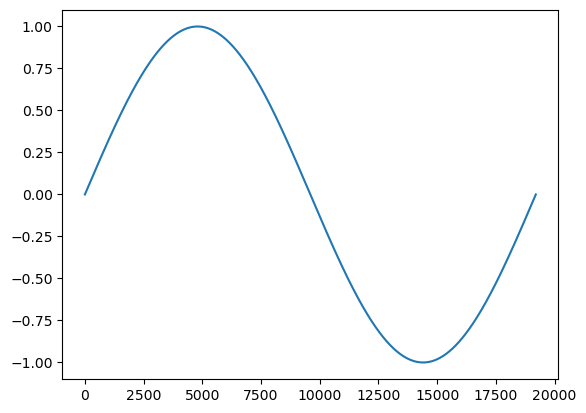

In [28]:
# Generate the original sine
w = np.pi/32
sample_rate = 300
period = int(2*np.pi/w)

t = np.linspace(0, period, period*sample_rate)
sine = np.sin(w*t)
plt.plot(sine)

[False False False ...  True  True  True]


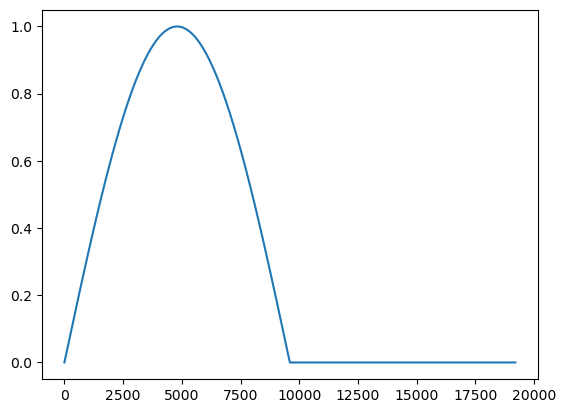

In [29]:
# Make 0 to all the negative values
is_negative = sine < 0 # Create a boolean array.
print(is_negative)

sine[is_negative] = 0
plt.figure()
plt.plot(sine)

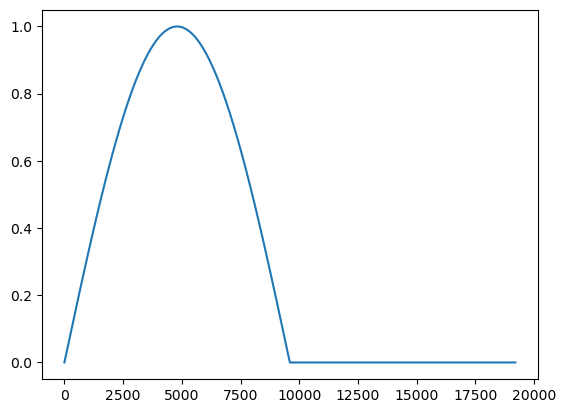

In [50]:
# Alternative way using a for loop instead of the boolean array
sine = np.sin(w*t)

for i in range(0, len(sine)):
    if sine[i] < 0:
        sine[i] = 0

plt.plot(sine)

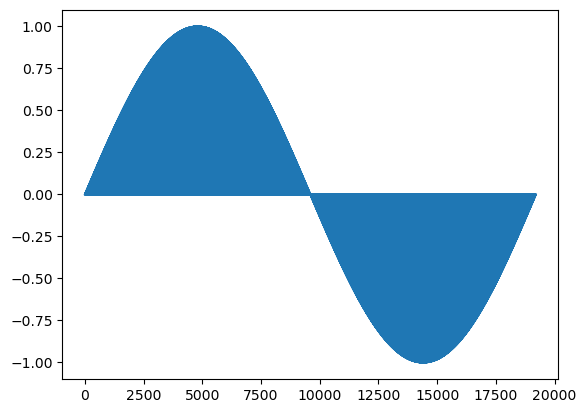

In [47]:
# Making 0 to all even samples
sine = np.sin(w*t)

even_sample = np.arange(len(sine)) % 2 == 0 # Change the operator == to != to get uneven samples

sine[even_sample] = 0
plt.plot(sine)

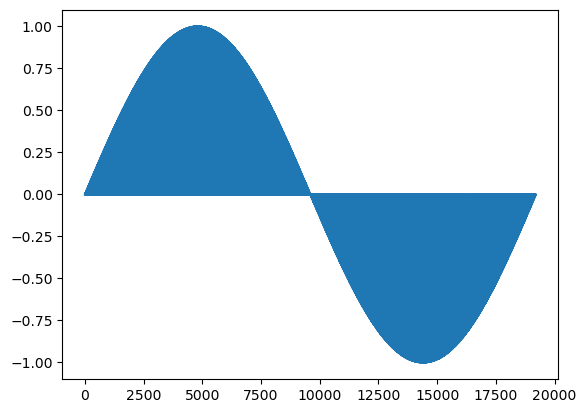

In [49]:
# Making 0 to all prime samples
sine = np.sin(w*t)

def is_prime(n): # Function to check if a number is prime
    if n < 2:
        return False # Create a false bool if the number is less than 2
    for i in range(2, int(n**0.5)+1):
        if n % i == 0: # Checks if it's divisible by any number between 2 and greater than the square root
            return False
    return True

# The function "is_prime" checks if the sample from sine is prime. 
# Use a for loop to go through all the samples from sine and check them with the function. 
# Then returns a bool value to generate the array.

prime_sample = np.array([is_prime(i) for i in range(len(sine))])
sine[prime_sample] = 0
plt.plot(sine)

★☆☆☆☆ - 3.06) Usar Numpy para generar un array con 91218 valores aleatorios que correspondan a una distribución uniforme de valores enteros entre 0 y 100. Luego, generar otro array de la misma cantidad de elementos pero con valores reales que correspondan a una distribución uniforme de media igual 0 y desvio estándar 1. Usando Matplotlib, grafique un hisograma a partir de los arrays generados. Recuerde que, para considerarse correctos, los gráficos deben tener toda la información necesaria para poder ser correctamente interpretados.

★☆☆☆☆ - 3.07) Graficar la señal definida a continuación de forma tal que se vea de la siguiente manera:

![ej_01](imagenes/ej_01.png)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(1001)
x = np.sin(2*(1/1000)*np.pi*n) * np.sin(2*(1/100)*np.pi*n)
x = x/max(abs(x)) #Normalización de la señal

★★☆☆☆ - 3.08) A continuación se genera una señal "y" que tiene la siguiente forma:

![ej_02_a](imagenes/ej_02_a.png)

A partir de la señal creada, generar un grafico que se vea de la siguiente manera:

![ej_02_b](imagenes/ej_02_b.png)

In [7]:
n = np.arange(1001)
y = (n**1.5) * np.sin(2*(1/100)*np.pi*n)
y = y/max(abs(y)) #Normalización de la señal

★★★☆☆ - 3.09) Consideremos un sistema cuya salida es el valor absoluto de su señal de entrada. Representar mediante *subplots* la señal de entrada y de salida del sistema, de forma tal que se vea así:

![ej_03](imagenes/ej_03.png)

DATA: La imagen tiene una relación de 10:8

In [5]:
n = np.arange(1001)
y = (n**1.5) * np.sin(2*(1/100)*np.pi*n)
y = y/max(abs(y)) #Normalización de la señal

entrada = y
salida = abs(y)

#Completar

★☆☆☆☆ - 3.10) Definir un vector de 2 segundos con una frecuencia de muestreo de 100Hz, es decir, 100 muestras por segundo. Implementando ese vector temporal, graficar un seno y un coseno con frecuencia de 1Hz, de forma tal que se vea así:

![ej_04](imagenes/ej_04.png)

★★☆☆☆ - 3.11) 

a) Generar un tono puro de 2 segundos de duración, junto con los tonos correspondientes a la quinta y la octava del tono fundamental (Ej: LA 440Hz, MI 660Hz, LA 880Hz), sumarlos y reproducir el acorde resultante. Guardar el array en un archivo .npy

b) En una nueva celda de código, cargar la señal y restarle los tonos correspondientes a la quinta y la octava, para finalmente reproducir el tono restante.


★★☆☆☆ - 3.12) Utilizando la biblioteca **soundfile** cargar un archivo wav (puede ser el audio.wav que se encuentra en la carpeta de la práctica), reducir 10 dB su amplitud y guardarlo. Graficar ambas formas de onda superpuestas.

★★★☆☆ - 3.13) Crear un programa que tome una señal de audio inicial y genere una nueva señal en la que los valores de cada elemento sean el promedio de los n valores siguientes del audio inicial. Es decir, si elegimos un n=50, el primer valor de la señal nueva debe ser el promedio de los primeros 50 valores de la señal inicial (muestra 1 a 50), mientras que el segundo valor de la señal nueva debe ser el promedio entre el valor 2 y 51 de la señal inicial, y así sucesivamente.

Por ultimo, reproducir ambas señales. Que efecto tiene este procesamiento en la señal original? Comentar lo que se considere al respecto.